***RandomforestClassifier*** 

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix

In [57]:
iris=load_iris()

In [58]:
features=pd.DataFrame(iris.data,columns=iris.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
label=pd.Series(iris.target,name='Target')

In [60]:
df=pd.concat([features,label],axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
x=df.drop('Target',axis=1)
y=df['Target']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [63]:
model=RandomForestClassifier(n_estimators=90)

In [64]:
scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
print(f'mean accuracy through that traning is:{np.mean(scores)*100}')

mean accuracy through that traning is:96.66666666666666


In [65]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [66]:
scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
print(f'mean accuracy through that traning is:{np.mean(scores)*100}')

mean accuracy through that traning is:95.83333333333333


In [67]:
prediction_test=model.predict(x_test)
prediction_test

array([1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1])

In [68]:
model.score(x_test,y_test)*100

90.0

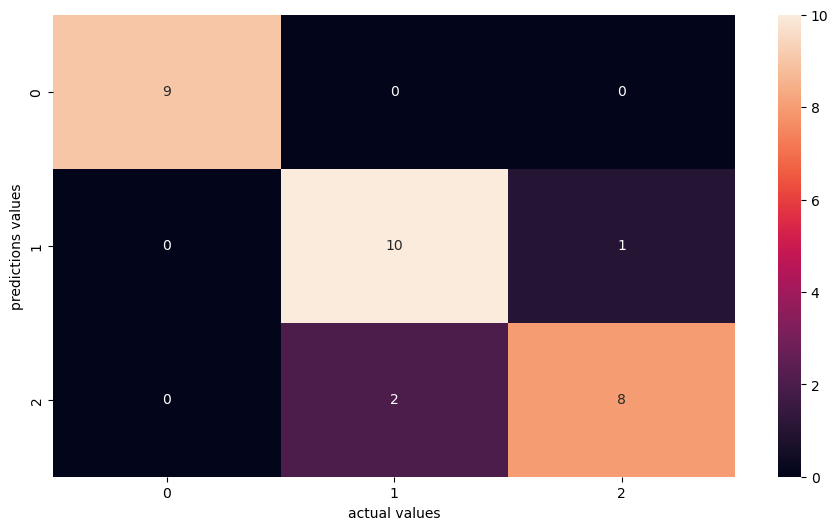

In [69]:
cm=confusion_matrix(y_test,prediction_test)
plt.figure(figsize=(11,6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predictions values')
plt.show()

***Random ForestRegression***

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
data=pd.read_csv('../data/houses.csv')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [73]:
data.isna().sum()

bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
price            1
dtype: int64

In [74]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan,strategy='mean')
data=im.fit_transform(data)

In [75]:
features=data[: ,: -1]
label=data[: ,-1]

In [76]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=10)

In [77]:
model=RandomForestRegressor(n_estimators=400)

In [78]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=400)

In [79]:
model.score(x_train,y_train)

0.9681635985891793

In [80]:
model.score(x_test,y_test)

0.8147336664136066

In [82]:
y_pred=model.predict(x_test)

In [83]:
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')
print(f'MSE:{mean_squared_error(y_test,y_pred)}')

MAE:8.151837670158722
MSE:263.60378625177674
